In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
from IPython.display import HTML
style = "<style>svg{width:70% !important; height:70% !important;}</style>"
HTML(style)

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [31]:
clf = DecisionTreeClassifier(criterion='entropy')

In [7]:
X = data[['X_1', 'X_2']]
y = data.Y

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

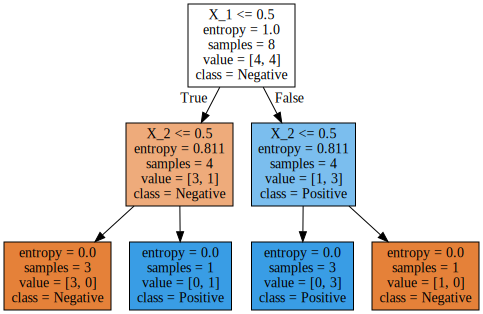

In [9]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [10]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [11]:
data = pd.DataFrame()
data["X1"] = [1,1,1,1,1,1,1,1,1,0]
data["X2"] = [1,1,1,1,0,0,0,0,1,0]
data["X3"] = [0,0,0,0,1,1,1,1,1,1]
data["Y"] = [1,1,1,1, 0,0,0,0,0,0]

In [29]:
clf_1 = DecisionTreeClassifier(criterion='entropy')

AttributeError: 'DecisionTreeClassifier' object has no attribute 'DecisionTreeClassifier'

In [13]:
XXX = data[['X1']]
yy = data.Y

In [14]:
clf_1.fit(XXX, yy)

DecisionTreeClassifier(criterion='entropy')

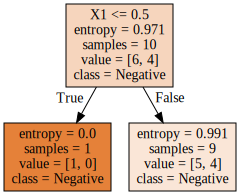

In [15]:
graph_1 = Source(tree.export_graphviz(clf_1, out_file=None,
                                   feature_names=list(XXX),
                                   class_names=['Negative', 'Positive'],
                                   filled=True))
display(SVG(graph_1.pipe(format='svg')))

In [16]:
data

,X1,X2,X3,Y
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,0,1,0
5,1,0,1,0
6,1,0,1,0
7,1,0,1,0
8,1,1,1,0
9,0,0,1,0


In [17]:
my_data = pd.read_csv("~/data/train_data_tree.csv")

In [51]:
my_data

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [38]:
hhh = DecisionTreeClassifier(criterion='entropy')

In [45]:
X = my_data.drop(['num'], axis=1)
y = my_data['num']

In [46]:
hhh.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

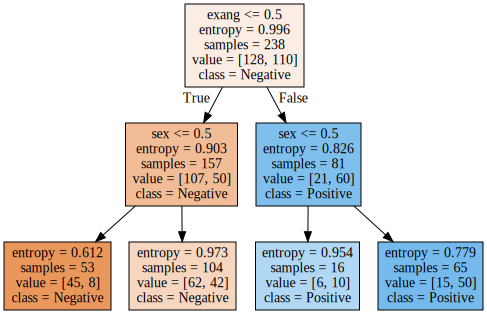

In [47]:
graph_2 = Source(tree.export_graphviz(hhh, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled=True))
display(SVG(graph_2.pipe(format='svg')))

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
X_iris = iris.data
y_iris = iris.target

In [5]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25)

In [60]:
dt = DecisionTreeClassifier()

In [61]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
predicted = dt.predict(X_test)

In [6]:
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth':range(1, 10),
              'min_samples_split':range(2, 10),
              'min_samples_leaf':range(1, 10)
             }
search = GridSearchCV(clf, parameters)

In [27]:
search.fit(X_iris, y_iris)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [30]:
search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
parameters = {'max_depth':range(1, 10),
              'min_samples_split':range(2, 10),
              'min_samples_leaf':range(1, 10)
             }
search = RandomizedSearchCV(clf, parameters)
search.fit(X, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [38]:
search.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=9)

In [9]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
